<a href="https://colab.research.google.com/github/srTeco/Projeto-Previsao-Turnover/blob/main/ProjetoPrevisaoTurnover_port_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Análise e Previsão do Turnover**


![](https://cdn.dribbble.com/users/488076/screenshots/2357709/media/6753e4435244a62717b20196a54d9ce8.gif)

---






# **Contexto:**
**O que é o turnover?**

Turnover, ou rotatividade de funcionários, refere-se à taxa com que os colaboradores deixam uma organização e são substituídos por novos.

Este indicador é crucial para entender a saúde organizacional, refletindo aspectos como satisfação no trabalho, cultura empresarial e eficácia na gestão de talentos. Altas taxas de turnover podem indicar problemas internos, como insatisfação dos funcionários ou falta de oportunidades de crescimento, enquanto taxas mais baixas geralmente sinalizam um ambiente de trabalho positivo.

A análise do turnover é fundamental para as empresas, pois impacta diretamente nos custos operacionais, na continuidade do conhecimento e na produtividade.



# **Problema de Negócio:**

![](https://media.tenor.com/VbYjG-jloBkAAAAM/computer-working.gif)

---
O RH da empresa coletou dados de 1.470 funcionários que deixaram ou permaneceram na companhia no último ano, identificando 19 fatores que podem influenciar essa decisão. Você como Cientista de Dados deve construir uma Máquina Preditiva cujo **objetivo é prever o turnover** de funcionários da empresa.

# **Dicionario de dados**


---


* **ID**: Matrícula do funcionário
* **Funcionário_deixou_a_empresa**: Marcação sem funcionário deixou a empresa recentemente
* **Idade**: Idade do funcionário
* **Frequência de Viagens**: Frequência de viagens a trabalho do funcionário
* **Distância_do_trabalho**: Distância em Km até o trabalho
* **Formação**: Nível de formação
* **E-Sat**: Satisfação com o clima organizacional
* **Gênero**: Gênero do funcionário
* **Estado_Civil**: Estado civil do funcionário
* **Salário**: Salário mensal
* **Qte_Empresas_Trabalhadas**: Quantidade de empresas que o funcionário já trabalhou
* **Faz_hora_extras?**: Se funcionário costuma fazer hora extra
* **Perc_de_aumento**: Percentual de aumento de salário de 2018 a 2019
* **Qte_ações_da_empresa**: Qte de lotes de ações da empresa que o funcionário possui
* **Tempo_de_carreira**: Tempo em anos que o funcionário tem de carreira
* **Horas_de_treinamento**: Qte de horas de treinamento que o funcionário teve no ano passado
* **Equilibrio_de_Vida**: Nota que o funcionário deu para seu equilibrio entre vida pessoal e profissional
* **Tempo_de_empresa**: Tempo em anos que o funcionário trabalha na empresa
* **Anos_no_mesmo_cargo**: Qte de tempo em anos que o funcionário atua no mesmo cargo
* **Anos_desde_a_ultima_promocao**: Qte de tempo em anos que o funcionário teve a última promoção
* **Anos_com_o_mesmo_chefe**: Qte de tempo em anos que o funcionário responde para o mesmo chefe


---

 ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ





In [ ]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.1 MB/s eta 0:00:00


# **0.0. IMPORTS**

In [ ]:
#Carregamento de bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection   import train_test_split
from sklearn.linear_model      import LogisticRegression
from sklearn.preprocessing     import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble          import RandomForestClassifier
from sklearn.tree              import DecisionTreeClassifier
from sklearn.metrics           import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics           import classification_report, confusion_matrix


from boruta                    import BorutaPy

from imblearn.over_sampling    import SMOTE

import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

## HELP FUNCTIONS

In [ ]:
def criar_anotacao_percent(ax, tipo, cor='black'):
    if tipo == 'porcentagem':
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', color=cor)
    else:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', color=cor)





## 0.1. Loading Data

In [ ]:
#Carregamento dos dados
data_rh = pd.read_excel('/content/drive/MyDrive/DSE/DATASETS/Base_RH.xlsx', sheet_name='Base', skiprows=2)

# **1.0. DESCRIÇÃO DOS DADOS**

Nesta etapa, foi realizada uma análise inicial do conjunto de dados, que contém informações sobre funcionários da empresa. Foram analisadas as dimensões, tipos de variáveis e possíveis valores ausentes e duplicados.

As primeiras cinco linhas do dataset estão apresentadas na tabela abaixo, e a análise incluiu:

Verificação da dimensão do dataset, que possui 1470 linhas e 21 colunas.
Identificação dos tipos de dados, separando as variáveis em numéricas e categóricas.
Verificação de valores ausentes (NA) e duplicados, onde foi constatado que não havia registros faltantes nem duplicados.

Esta descrição fornece uma visão geral dos dados que serão utilizados nas próximas etapas de análise exploratória e construção de modelos preditivos.

In [ ]:
df1 = data_rh.copy()
df1.head()

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,8,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,1,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,6,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,1,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,9,Não,12,1,6,3,Muito bom,2,2,2,2


## 1.1. Columns

In [ ]:
df1.columns

Index(['ID', 'Funcionário_deixou_a_empresa', 'Idade', 'Frequência de Viagens',
       'Distância_do_trabalho', 'Formação', 'E-Sat', 'Gênero', 'Estado_Civil',
       'Salário', 'Qte_Empresas_Trabalhadas', 'Faz_hora_extras?',
       'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
       'Horas_de_treinamento', 'Equilibrio_de_Vida', 'Tempo_de_empresa',
       'Anos_no_mesmo_cargo', 'Anos_desde_a_ultima_promocao',
       'Anos_com_o_mesmo_chefe'],
      dtype='object')

## 1.2  Data Dimensions

O dataset tem o seguinte formato:

Número de Linhas: 1470
Número de Colunas: 21

In [ ]:
df1.shape
print(f'O dataset possui {df1.shape[0]} Linhas e {df1.shape[1]} colunas')

O dataset possui 1470 Linhas e 21 colunas


## 1.3 Data Types

**Variáveis numéricas:** ID, Idade, Distância_do_trabalho, Salário, Qte_Empresas_Trabalhadas, Perc_de_aumento, Qte_ações_da_empresa    Tempo_de_carreira, Horas_de_treinamento  Tempo_de_empresa, Anos_no_mesmo_cargo, Anos_desde_a_ultima_promocao

**Variáveis categóricas:** Funcionário_deixou_a_empresa, Frequência de Viagens, Formação, E-Sat, Gênero, Estado_Civil, Faz_hora_extras?, Equilibrio_de_Vida

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            1470 non-null   int64 
 1   Funcionário_deixou_a_empresa  1470 non-null   object
 2   Idade                         1470 non-null   int64 
 3   Frequência de Viagens         1470 non-null   object
 4   Distância_do_trabalho         1470 non-null   int64 
 5   Formação                      1470 non-null   object
 6   E-Sat                         1470 non-null   object
 7   Gênero                        1470 non-null   object
 8   Estado_Civil                  1470 non-null   object
 9   Salário                       1470 non-null   int64 
 10  Qte_Empresas_Trabalhadas      1470 non-null   int64 
 11  Faz_hora_extras?              1470 non-null   object
 12  Perc_de_aumento               1470 non-null   int64 
 13  Qte_ações_da_empre

## 1.4 Check NA

Foram verificadas a existência de valores ausentes (NA) no conjunto de dados.

In [ ]:
df1.isna().sum()

,0
ID,0
Funcionário_deixou_a_empresa,0
Idade,0
Frequência de Viagens,0
Distância_do_trabalho,0
Formação,0
E-Sat,0
Gênero,0
Estado_Civil,0
Salário,0


## 1.4 Check Duplicated
Foi realizada a verificação para identificar registros duplicados.

In [ ]:
df1.duplicated().sum()

0

## 1.5. Descriptive Statistics
Foram calculadas as principais estatísticas descritivas das variáveis numéricas e categóricas para entender melhor a distribuição dos dados.

In [ ]:
df1.describe()

,ID,Idade,Distância_do_trabalho,Salário,Qte_Empresas_Trabalhadas,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,9.192517,6502.931293,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,8.106864,4707.956783,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,2.000000,2911.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,7.000000,4919.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,14.000000,8379.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,29.000000,19999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


## 1.6 Categorical Atributes
Aqui estão as estatísticas descritivas para as variáveis categóricas do dataset:

In [ ]:
df1.describe(include='object')

,Funcionário_deixou_a_empresa,Frequência de Viagens,Formação,E-Sat,Gênero,Estado_Civil,Faz_hora_extras?,Equilibrio_de_Vida
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,5,4,2,3,2,4
top,Não,Viaja raramente,Ensino Superior,Alto,H,Casado,Não,Muito bom
freq,1233,1043,572,453,882,673,1054,893


In [ ]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#**2.0. CRIAÇÃO DE HIPÓTESES**
A análise foi iniciada com a criação de um mapa de hipóteses para explorar as possíveis relações entre as variáveis do dataset e a taxa de turnover dos funcionários.

##Mapa de Hipoteses


![](https://iili.io/2FthJ0x.png)

##2.1. Funcionários vs Deixar empresa

Foram criadas 13 hipoteses para iniciar


**1.**  Funcionários mais jovens (por exemplo, abaixo de 30 anos) têm maior probabilidade de deixar a empresa.

**2.**  Funcionários com maior nível de formação têm menor probabilidade de deixar a empresa.

**3.**  Funcionários com salário mais baixo têm maior probabilidade de deixar a empresa.

**4.**  Funcionários com níveis mais baixos de satisfação têm maior probabilidade de deixar a empresa.

**5.**  Funcionários do sexo masculino têm maior probabilidade de deixar a empresa.

**6.**  Funcionários casados têm menor probabilidade de deixar a empresa.

**7.**  Funcionários com um equilíbrio de vida ruim têm maior probabilidade de deixar a empresa.

**8.**  Funcionários com menor tempo de empresa têm maior probabilidade de deixar a empresa.

**9.**  Funcionários que permanecem no mesmo cargo por mais de 5 anos têm maior probabilidade de deixar a empresa.

**10.**  FFuncionários que têm o mesmo chefe há mais de 10 anos têm maior probabilidade de deixar a empresa.

**11.**  Funcionários que fazem horas extras têm maior probabilidade de deixar a empresa.

**12.**  Funcionários que moram a mais de 10 km do trabalho têm maior probabilidade de deixar a empresa.

**13.**  Funcionários que recebem aumentos abaixo de 10% têm maior probabilidade de deixar a empresa.





# **3.0. ANÁLISE EXPLORATÓRIA DOS DADOS**

A análise exploratória dos dados (EDA) foi conduzida com o objetivo de entender a distribuição das variáveis e identificar padrões, outliers ou qualquer outro comportamento incomum que possa impactar os resultados do modelo de machine learning.

In [ ]:
df2 = df1.copy()
df2.head()

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,8,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,1,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,6,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,1,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,9,Não,12,1,6,3,Muito bom,2,2,2,2


## 3.1. Análise Univariada

Nesta etapa, foram analisadas as variáveis de forma individual para entender melhor suas distribuições e valores.

###3.1.1 variaveis categoricas

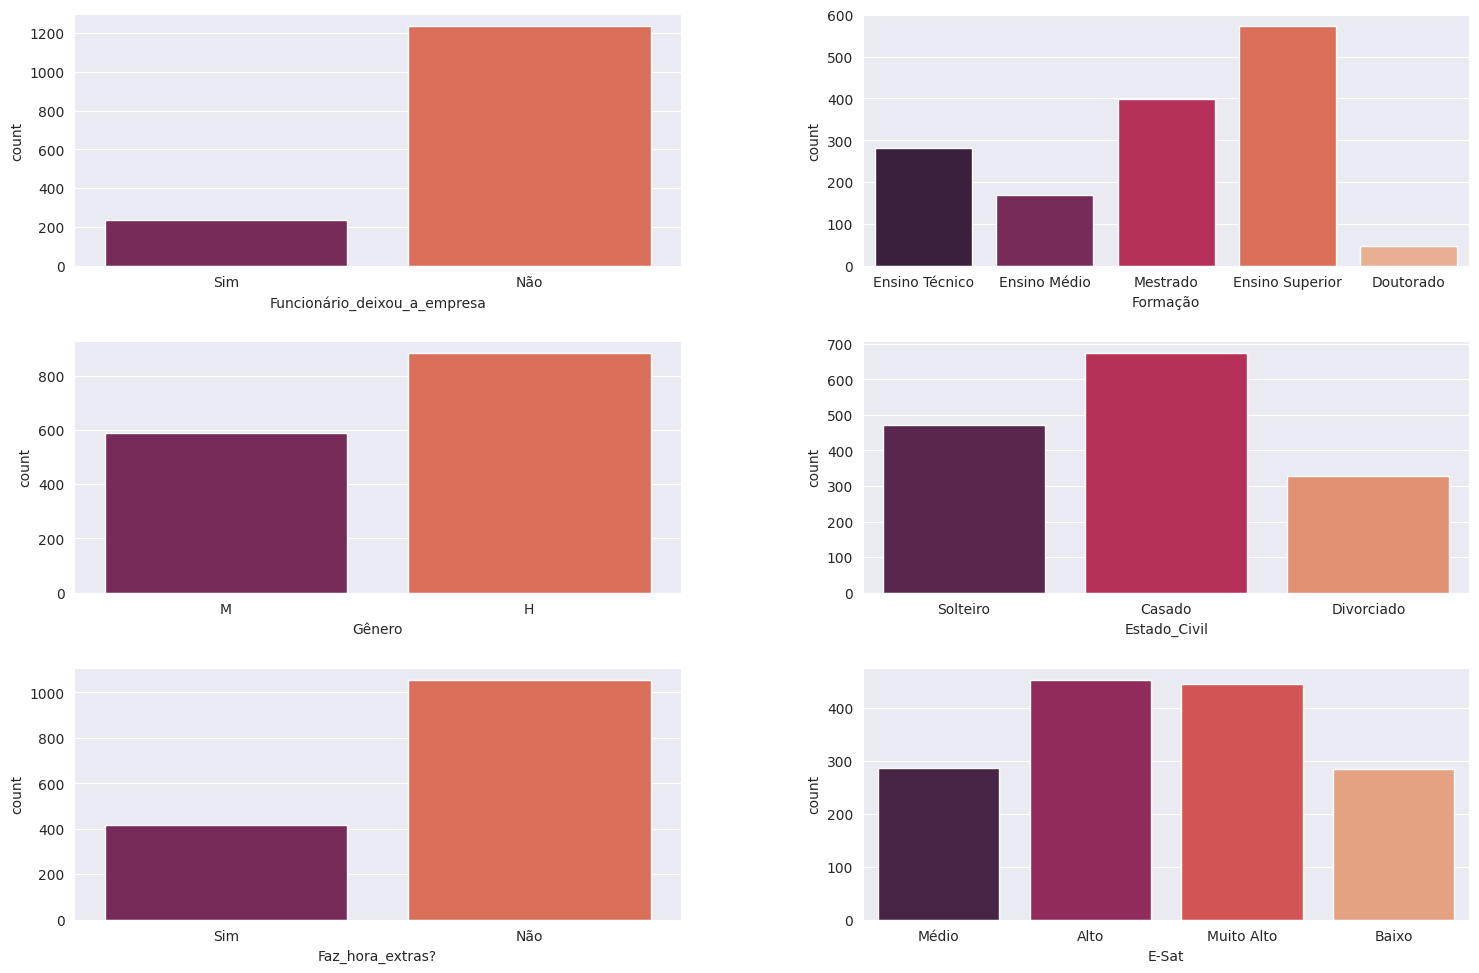

In [ ]:
sns.set_style("darkgrid")

#Distribuição Turnover
plt.figure(figsize=(18, 16))
plt.subplot(4,2, 1)
sns.countplot(data=df2, x='Funcionário_deixou_a_empresa',palette='rocket')

#Distribuição Formação
plt.subplot( 4, 2, 2 )
sns.countplot(data=df2, x='Formação', hue='Formação', palette='rocket')

#Distribuição Genero
plt.subplot( 4, 2, 3 )
sns.countplot(data=df2, x='Gênero',hue='Gênero', palette='rocket')

#Distribuição Estado civil
plt.subplot( 4, 2, 4 )
sns.countplot(data=df2, x='Estado_Civil', hue='Estado_Civil', palette='rocket')

#Distribuição Faz_hora_extras?
plt.subplot( 4, 2, 5 )
sns.countplot(data=df2, x='Faz_hora_extras?', hue='Faz_hora_extras?', palette='rocket')

#Distribuição E-Sat
plt.subplot( 4, 2, 6 )
sns.countplot(data=df2, x='E-Sat', hue='E-Sat', palette='rocket')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

###3.1.2 Variaveis numericas

<Figure size 2500x1000 with 0 Axes>

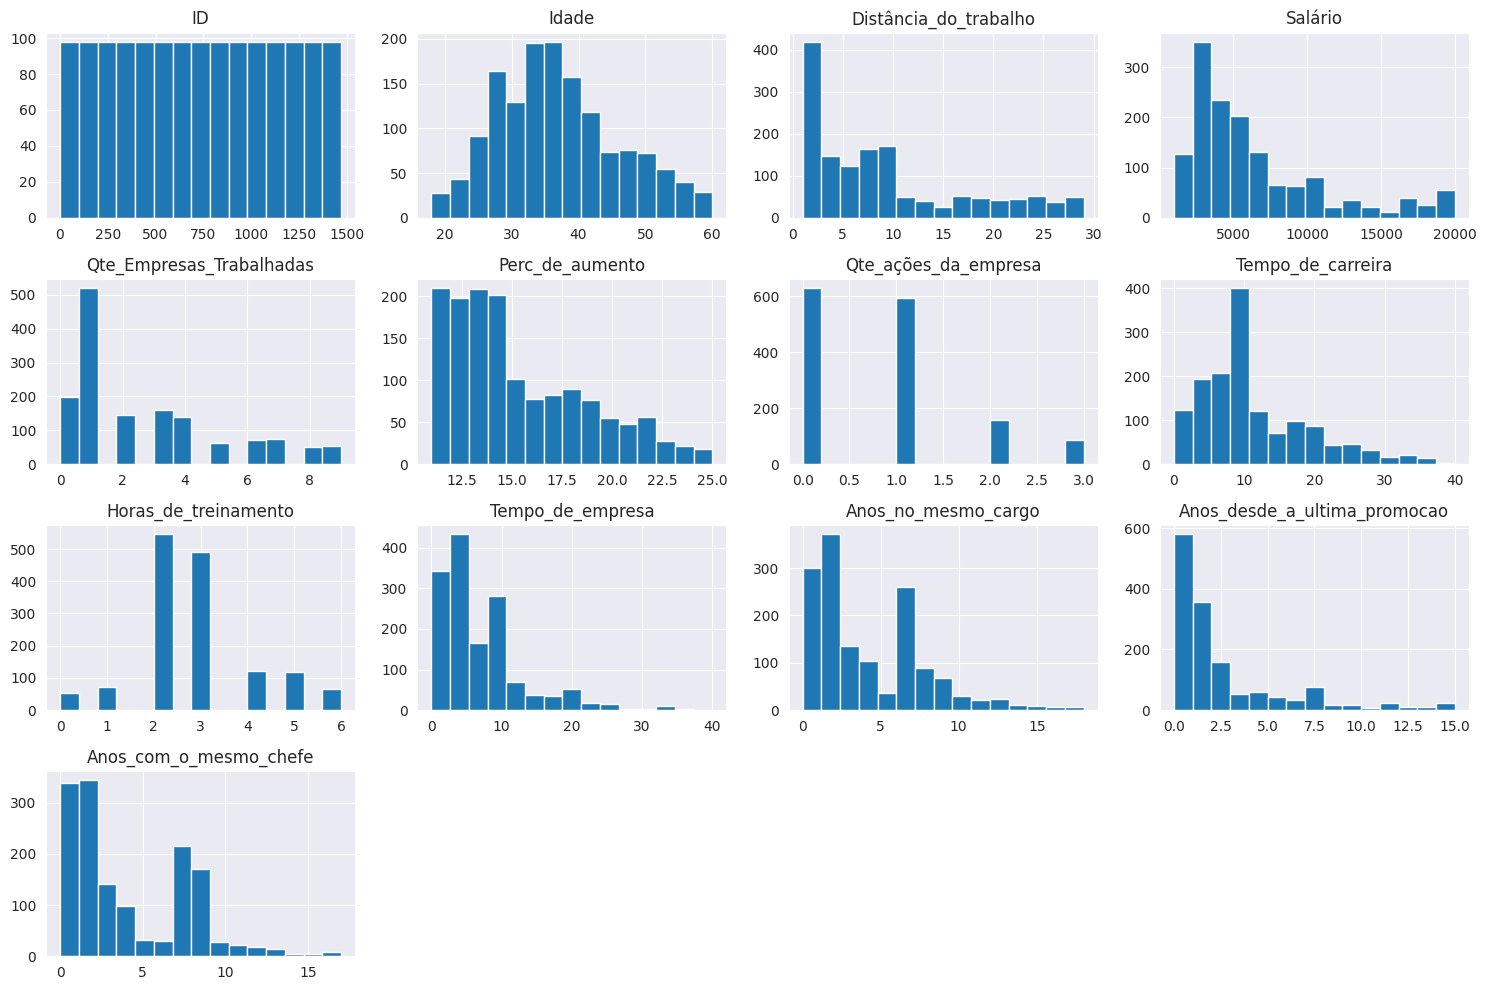

In [ ]:
plt.figure(figsize=(25, 10))

num_attributes.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

## 3.2 Análise Bivariada
A análise bivariada foi realizada para explorar a relação entre duas variáveis e verificar as hipóteses previamente levantadas.

### H1 - Funcionários mais jovens (por exemplo, abaixo de 30 anos) têm maior probabilidade de deixar a empresa.

**VERDADEIRA** - Funcionarios com menos de 30 anos tem maior probabilidade de deixar a empresa.

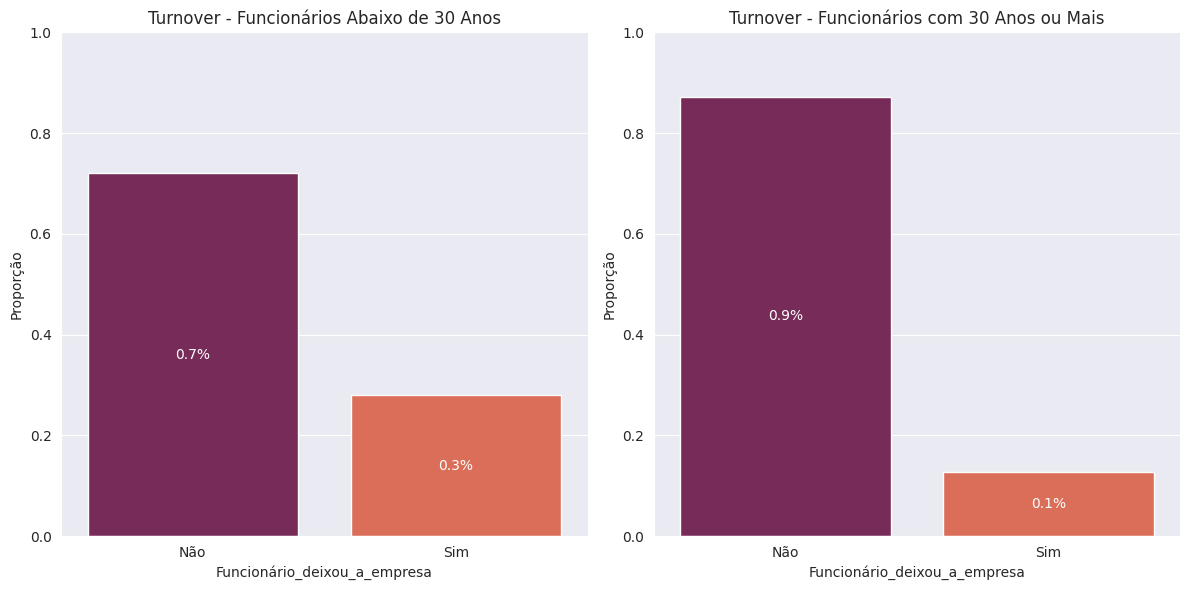

In [ ]:
# Calcular as proporções de turnover para funcionários abaixo de 30 anos
turnover_jovens = df2[df2['Idade'] < 30]['Funcionário_deixou_a_empresa'].value_counts(normalize=True)

# Calcular as proporções de turnover para funcionários com 30 anos ou mais
turnover_mais_velhos = df2[df2['Idade'] >= 30]['Funcionário_deixou_a_empresa'].value_counts(normalize=True)

# Preparar os dados para o gráfico
turnover_data = pd.DataFrame({
    'Funcionário_deixou_a_empresa': ['Não', 'Sim'],
    'Abaixo de 30': turnover_jovens.values,
    '30 ou Mais': turnover_mais_velhos.values
})

# Configurar os subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para funcionários abaixo de 30 anos
sns.barplot(x='Funcionário_deixou_a_empresa', y='Abaixo de 30', data=turnover_data,hue='Funcionário_deixou_a_empresa', ax=axs[0], palette='rocket' )
axs[0].set_title('Turnover - Funcionários Abaixo de 30 Anos')
axs[0].set_ylim(0, 1)
axs[0].set_ylabel('Proporção')
criar_anotacao_percent(axs[0],'porcentagem','white')

# Gráfico para funcionários com 30 anos ou mais
sns.barplot(x='Funcionário_deixou_a_empresa', y='30 ou Mais', data=turnover_data, ax=axs[1], palette='rocket')
axs[1].set_title('Turnover - Funcionários com 30 Anos ou Mais')
axs[1].set_ylim(0, 1)
axs[1].set_ylabel('Proporção')
criar_anotacao_percent(axs[1],'porcentagem','white')

plt.tight_layout()
plt.show()



### H2 - Funcionários com maior nível de formação têm menor probabilidade de deixar a empresa.

**FALSA** - Funcionarios com maior nivel de formação tem maior probabilidade de deixar a empresa

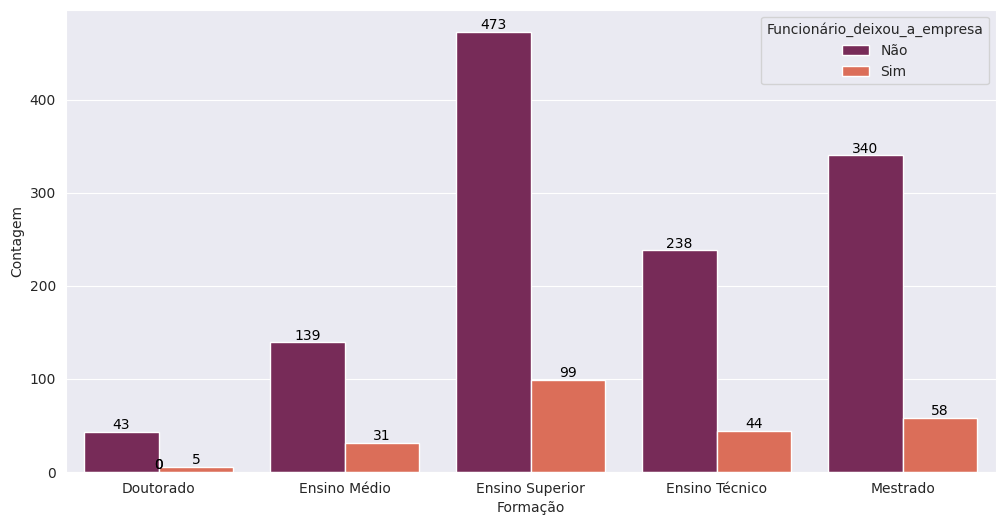

In [ ]:
plt.figure(figsize=(12,6))
turnover_formacao = df2.groupby(['Formação','Funcionário_deixou_a_empresa'])['Funcionário_deixou_a_empresa'].count().reset_index(name='Contagem')
turnover_formacao

ax = sns.barplot(data=turnover_formacao,x='Formação', y='Contagem', hue='Funcionário_deixou_a_empresa', palette='rocket')
criar_anotacao_percent(ax,'contagem','black')

### H3 - Funcionários com salário mais baixo têm maior probabilidade de deixar a empresa.

**VERDADEIRA** - Funcionários com salários mais baixos têm maior probabilidade de deixar a empresa

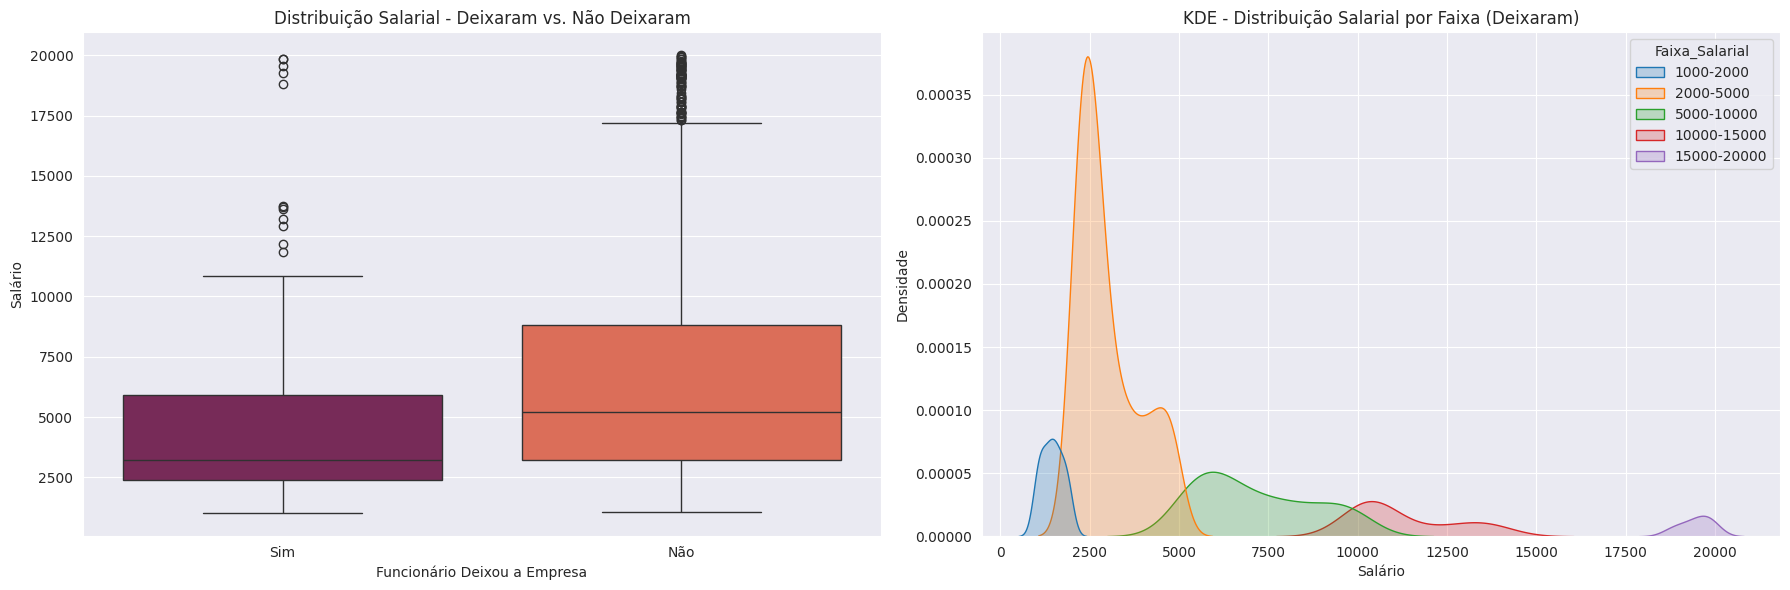

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=df2, x='Funcionário_deixou_a_empresa', y='Salário', ax=axs[0], palette='rocket')
axs[0].set_title('Distribuição Salarial - Deixaram vs. Não Deixaram')
axs[0].set_xlabel('Funcionário Deixou a Empresa')
axs[0].set_ylabel('Salário')

df_turnover = df2[df2['Funcionário_deixou_a_empresa'] == 'Sim']

bins = [1000, 2000, 5000, 10000, 15000, 20000]
labels = ['1000-2000', '2000-5000', '5000-10000', '10000-15000', '15000-20000']
df_turnover['Faixa_Salarial'] = pd.cut(df_turnover['Salário'], bins=bins, labels=labels, right=False)

sns.kdeplot(data=df_turnover, x='Salário', hue='Faixa_Salarial', shade=True, ax=axs[1])
axs[1].set_title('KDE - Distribuição Salarial por Faixa (Deixaram)')
axs[1].set_xlabel('Salário')
axs[1].set_ylabel('Densidade')

plt.tight_layout()
plt.show()




###H4 - Funcionários com níveis mais baixos de satisfação têm maior probabilidade de deixar a empresa.

**VERDADEIRA** - Funcionários com níveis mais baixos de satisfação têm maior probabilidade de deixar a empresa, enquanto aqueles com satisfação mais alta tendem a permanecer.







<Figure size 1200x800 with 0 Axes>

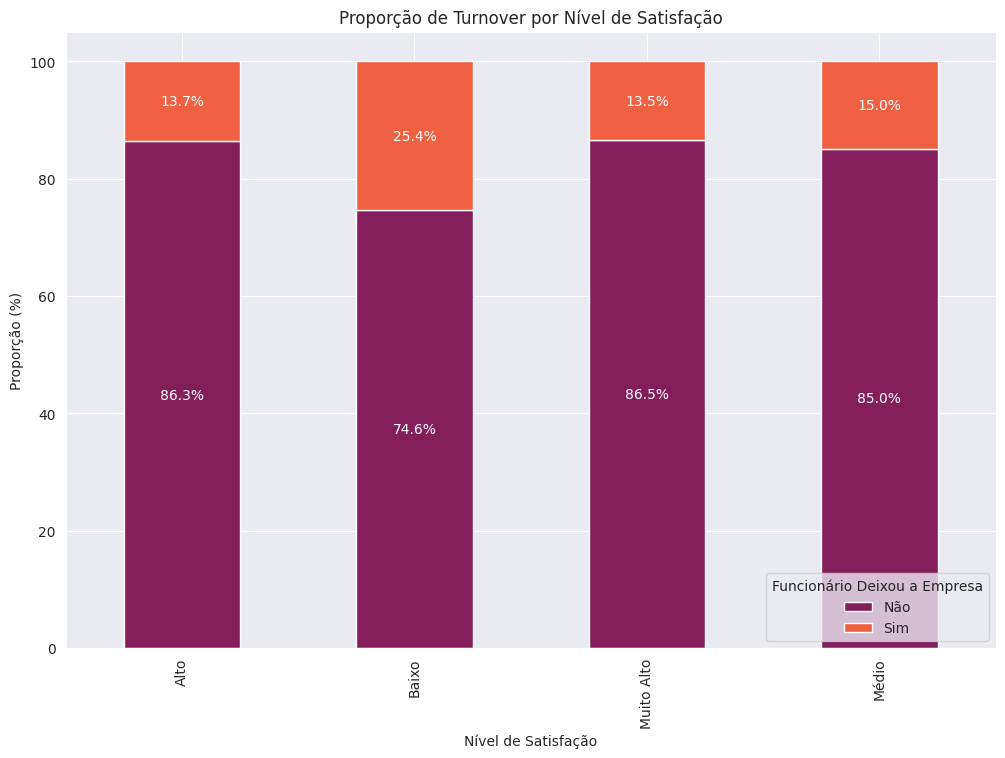

In [ ]:
colors = sns.color_palette('rocket', 2)

# Calcular a contagem de funcionários que deixaram ou não a empresa em cada nível de satisfação
satisfacao_turnover = df2.groupby(['E-Sat', 'Funcionário_deixou_a_empresa']).size().unstack()

# Transformar em proporção para cada nível de satisfação
satisfacao_turnover_pct = satisfacao_turnover.div(satisfacao_turnover.sum(axis=1), axis=0) * 100

# Plotar gráfico de barras empilhadas para comparar
plt.figure(figsize=(12, 8))
ax = satisfacao_turnover_pct.plot(kind='bar', stacked=True, color=colors,figsize=(12, 8))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', color='white')


plt.title('Proporção de Turnover por Nível de Satisfação')
plt.xlabel('Nível de Satisfação')
plt.ylabel('Proporção (%)')
plt.legend(['Não', 'Sim'], title='Funcionário Deixou a Empresa', loc='lower right',)

plt.show()




In [ ]:
satisfacao_turnover_pct

Funcionário_deixou_a_empresa,Não,Sim
E-Sat,,
Alto,86.313466,13.686534
Baixo,74.647887,25.352113
Muito Alto,86.547085,13.452915
Médio,85.017422,14.982578




### H5 - Funcionários do sexo masculino têm maior probabilidade de deixar a empresa.

**VERDADE** - Os gráficos indicam que, proporcionalmente, os homens têm uma taxa de saída um pouco maior do que as mulheres.



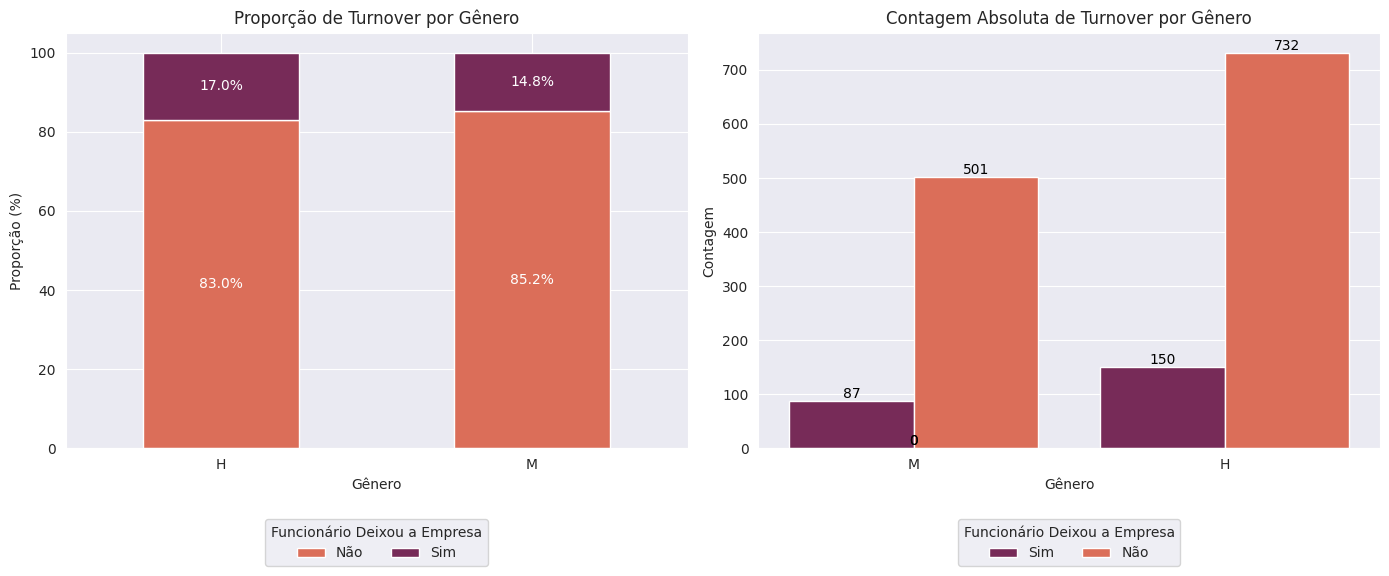

In [ ]:
# Calcular a contagem de funcionários que deixaram ou não a empresa por gênero
genero_turnover = df2.groupby(['Gênero', 'Funcionário_deixou_a_empresa']).size().unstack()

# Transformar em proporção para o primeiro gráfico
genero_turnover_pct = genero_turnover.div(genero_turnover.sum(axis=1), axis=0) * 100

# Configurar subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Definir as cores para ambos os gráficos
colors = ['#db6e59','#772b58']  # 'Sim' e 'Não'

# Gráfico de barras empilhadas para proporção de turnover por gênero
genero_turnover_pct.plot(kind='bar', stacked=True, color=colors, ax=axs[0])
axs[0].set_title('Proporção de Turnover por Gênero')
axs[0].set_xlabel('Gênero')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0)
axs[0].set_ylabel('Proporção (%)')
axs[0].legend(['Não', 'Sim'], title='Funcionário Deixou a Empresa', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
criar_anotacao_percent(axs[0],'porcentagem','white')



# Gráfico de barras agrupadas para contagem absoluta de turnover por gênero
sns.countplot(data=df2, x='Gênero', hue='Funcionário_deixou_a_empresa', palette='rocket', ax=axs[1])
axs[1].set_title('Contagem Absoluta de Turnover por Gênero')
axs[1].set_xlabel('Gênero')
axs[1].set_ylabel('Contagem')
axs[1].legend(['Sim', 'Não'], title='Funcionário Deixou a Empresa', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
criar_anotacao_percent(axs[1],'contagem','black')



# Ajustar layout
plt.tight_layout()
plt.show()

In [ ]:
genero_turnover

Funcionário_deixou_a_empresa,Não,Sim
Gênero,,
H,732,150
M,501,87


### H6 Funcionários casados têm menor probabilidade de deixar a empresa.
**FALSA** - A análise mostra que funcionários casados e divorciados têm, de fato, menor probabilidade de deixar a empresa em comparação aos solteiros.





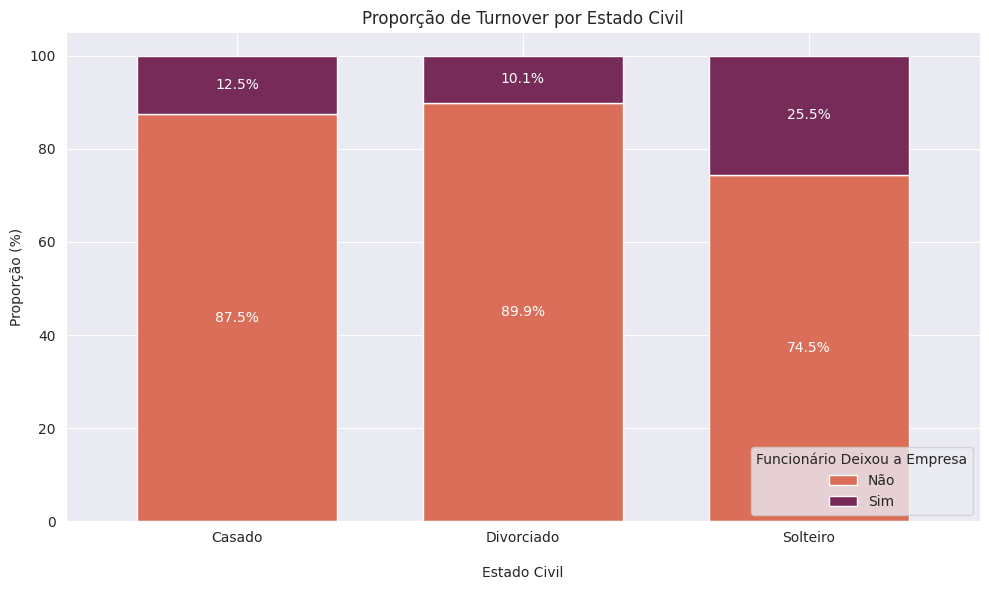

In [ ]:
estado_civil_turnover = df2.groupby(['Estado_Civil', 'Funcionário_deixou_a_empresa']).size().unstack()
estado_civil_turnover_pct = estado_civil_turnover.div(estado_civil_turnover.sum(axis=1), axis=0) * 100
colors = ['#db6e59','#772b58']
# Configurar o gráfico
ax = estado_civil_turnover_pct.plot(kind='bar', stacked=True, color=colors, width=0.7,figsize=(10, 6))
criar_anotacao_percent(ax,'porcentagem','white')

# Configurar o título e rótulos dos eixos
plt.title('Proporção de Turnover por Estado Civil')
plt.ylabel('Proporção (%)')
plt.xlabel('Estado Civil',labelpad=15)

plt.xticks(rotation=0)
plt.legend(['Não', 'Sim'], title='Funcionário Deixou a Empresa', loc='lower right')


plt.tight_layout()
plt.show()



### H7 - Funcionários com menor tempo de empresa(menos de 5 anos) têm maior probabilidade de deixar a empresa.

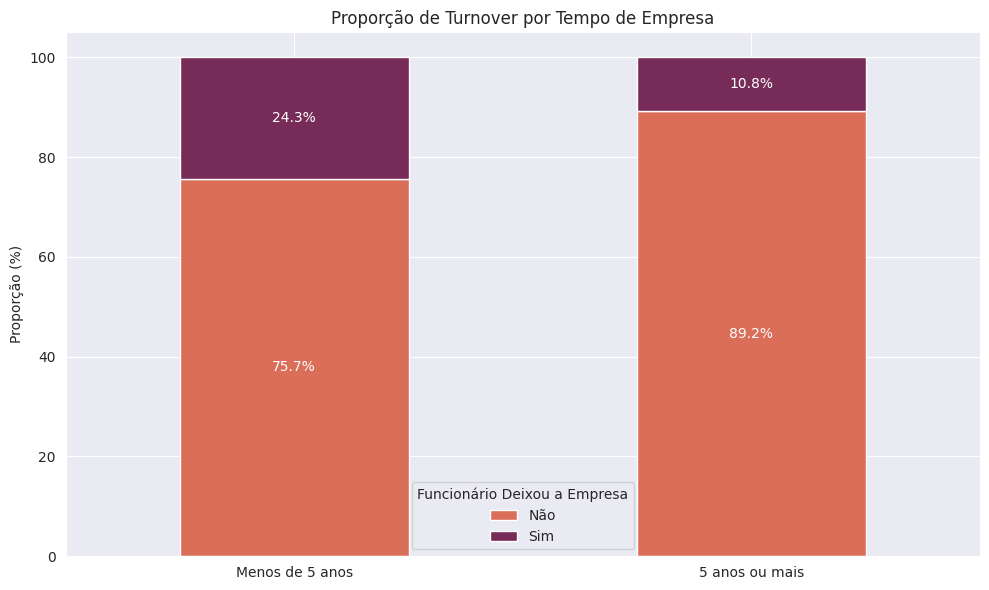

In [ ]:
# Filtrar dados
funcionarios_menos_5_anos = df2[df2['Tempo_de_empresa'] < 5]
funcionarios_5_anos_ou_mais = df2[df2['Tempo_de_empresa'] >= 5]

# Calcular proporções de turnover para cada grupo
turnover_menos_5_anos = funcionarios_menos_5_anos['Funcionário_deixou_a_empresa'].value_counts(normalize=True) * 100
turnover_5_anos_ou_mais = funcionarios_5_anos_ou_mais['Funcionário_deixou_a_empresa'].value_counts(normalize=True) * 100

# Criar DataFrame para visualização
turnover_comparacao = pd.DataFrame({
    'Menos de 5 anos': turnover_menos_5_anos,
    '5 anos ou mais': turnover_5_anos_ou_mais
}).transpose()

# Configurar gráfico de barras empilhadas para comparar as proporções de turnover
fig, ax = plt.subplots(figsize=(10, 6))
turnover_comparacao.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Configurações adicionais do gráfico
ax.set_ylabel('Proporção (%)')
ax.set_title('Proporção de Turnover por Tempo de Empresa')
ax.legend(title='Funcionário Deixou a Empresa', labels=['Não', 'Sim'])
ax.set_xticklabels(['Menos de 5 anos', '5 anos ou mais'], rotation=0)

# Adicionar anotações para as proporções
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='white')

plt.tight_layout()
plt.show()

### H8 - Funcionários com um equilíbrio de vida ruim têm maior probabilidade de deixar a empresa.

**VERDADEIRA** - Funcionários que percebem um equilíbrio de vida ruim têm uma probabilidade substancialmente maior de deixar a empresa em relação aqueles que avaliam seu equilíbrio de vida de forma mais positiva.





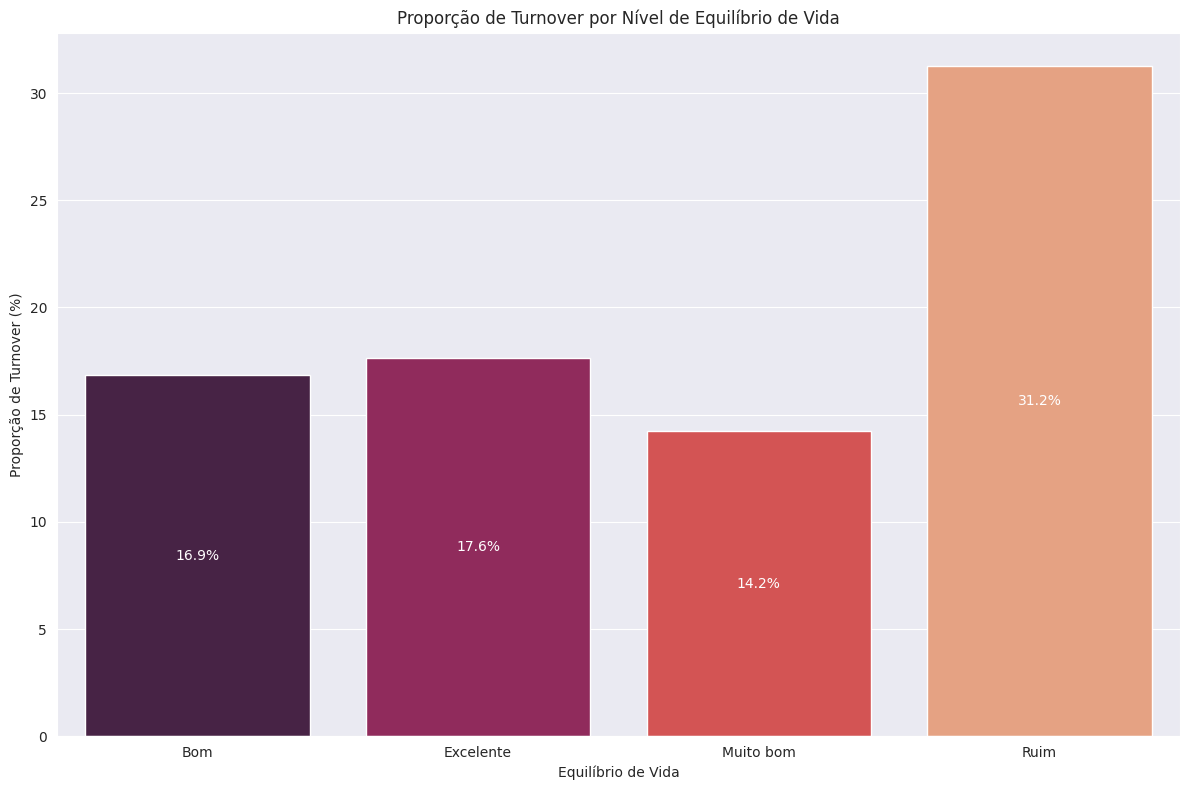

In [ ]:
# Calcular a proporção de funcionários que deixaram a empresa em cada nível de equilíbrio de vida
vida_turnover = df2[df2['Funcionário_deixou_a_empresa'] == 'Sim'].groupby('Equilibrio_de_Vida').size()
total_vida = df2.groupby('Equilibrio_de_Vida').size()
proporcao_turnover = (vida_turnover / total_vida) * 100

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=proporcao_turnover.index, y=proporcao_turnover.values, palette='rocket')
criar_anotacao_percent(ax,'porcentagem','white')
plt.title('Proporção de Turnover por Nível de Equilíbrio de Vida')
plt.xlabel('Equilíbrio de Vida')
plt.ylabel('Proporção de Turnover (%)')

plt.tight_layout()
plt.show()

### H9 - Funcionários que permanecem no mesmo cargo por mais de 5 anos têm maior probabilidade de deixar a empresa.

**FALSA** - Os funcionários que permanecem no mesmo cargo por mais de 5 anos têm uma menor probabilidade de deixar a empresa




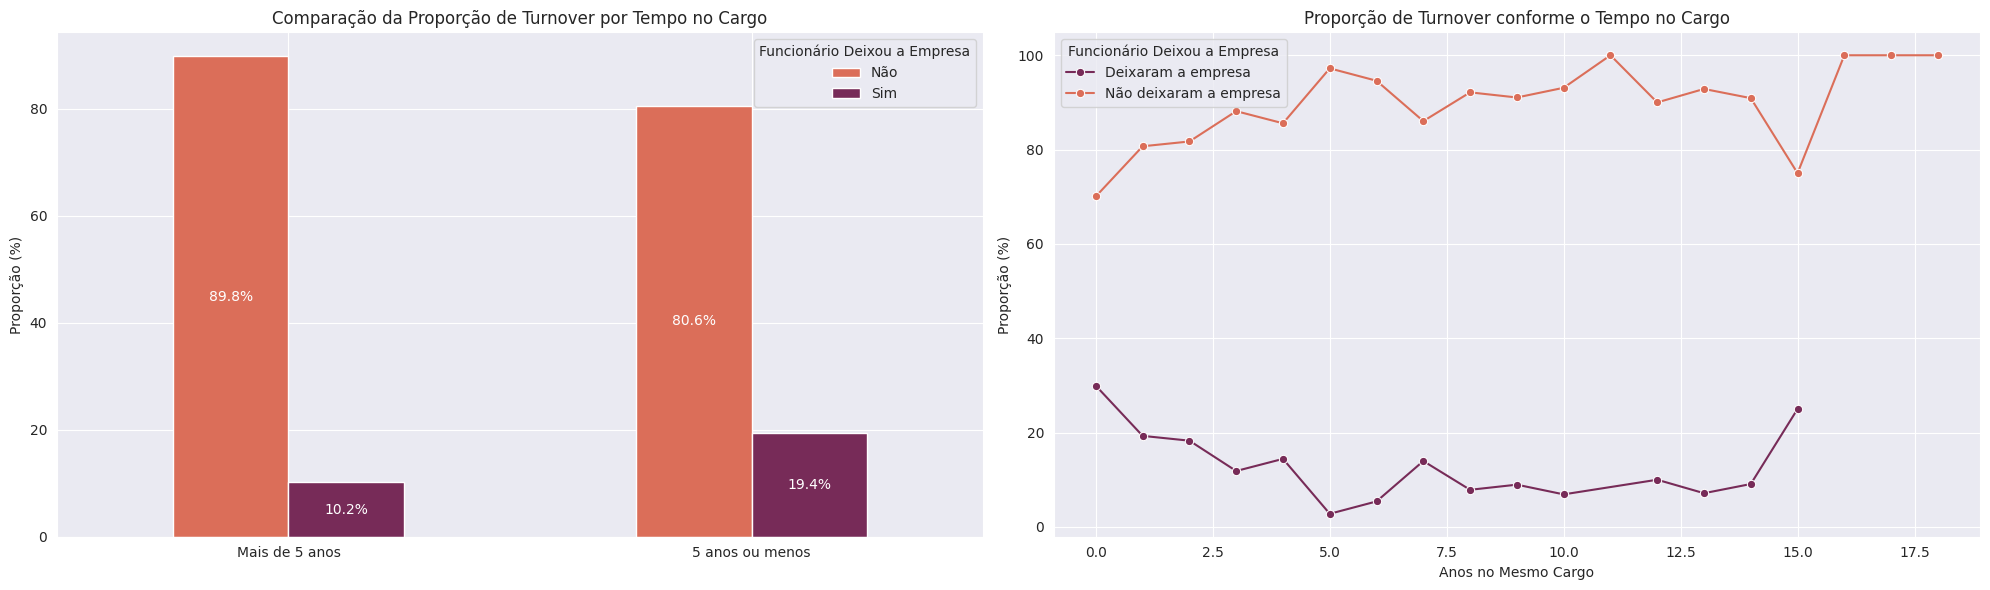

In [ ]:
turnover_por_tempo_cargo = df2.groupby('Anos_no_mesmo_cargo')['Funcionário_deixou_a_empresa'].value_counts(normalize=True).unstack() * 100

# Dividir em dois grupos
grupo_mais_de_cinco = df2[df2['Anos_no_mesmo_cargo'] > 5]
grupo_menos_ou_igual_cinco = df2[df2['Anos_no_mesmo_cargo'] <= 5]

# Calcular proporções de turnover para cada grupo
turnover_mais_de_cinco = grupo_mais_de_cinco['Funcionário_deixou_a_empresa'].value_counts(normalize=True) * 100
turnover_menos_ou_igual_cinco = grupo_menos_ou_igual_cinco['Funcionário_deixou_a_empresa'].value_counts(normalize=True) * 100

# Criar DataFrame para visualização
turnover_comparacao = pd.DataFrame({
    'Mais de 5 anos': turnover_mais_de_cinco,
    '5 anos ou menos': turnover_menos_ou_igual_cinco
}).transpose()


# Criar figura e eixos
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico de linhas para mostrar a tendência do turnover conforme o tempo no cargo
sns.lineplot(data=turnover_por_tempo_cargo, x=turnover_por_tempo_cargo.index, y='Sim', marker='o', label='Deixaram a empresa', color='#772b58', ax=axs[1])
sns.lineplot(data=turnover_por_tempo_cargo, x=turnover_por_tempo_cargo.index, y='Não', marker='o', label='Não deixaram a empresa', color='#db6e59', ax=axs[1])
axs[1].set_ylabel('Proporção (%)')
axs[1].set_xlabel('Anos no Mesmo Cargo')
axs[1].set_title('Proporção de Turnover conforme o Tempo no Cargo')
axs[1].legend(title='Funcionário Deixou a Empresa')

#for line in axs[1].get_lines():
#        for x, y in zip(line.get_xdata(), line.get_ydata()):
#            axs[1].annotate(f'{y:.1f}%', (x, y), ha='center', va='bottom', color='black')


# Gráfico de barras para comparação
turnover_comparacao.plot(kind='bar', stacked=False, color=colors, ax=axs[0])
axs[0].set_ylabel('Proporção (%)')
axs[0].set_title('Comparação da Proporção de Turnover por Tempo no Cargo')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0)
axs[0].legend(title='Funcionário Deixou a Empresa', labels=['Não', 'Sim'])
criar_anotacao_percent(axs[0],'porcentagem','white')


# Ajustar layout
plt.tight_layout()

# Exibir gráficos
plt.show()


### H10 - Funcionários que têm o mesmo chefe há mais de 10 anos têm maior probabilidade de deixar a empresa.


**FALSA** - Funcionários com menos de 10 anos com o mesmo chefe têm uma probabilidade maior de deixar a empresa




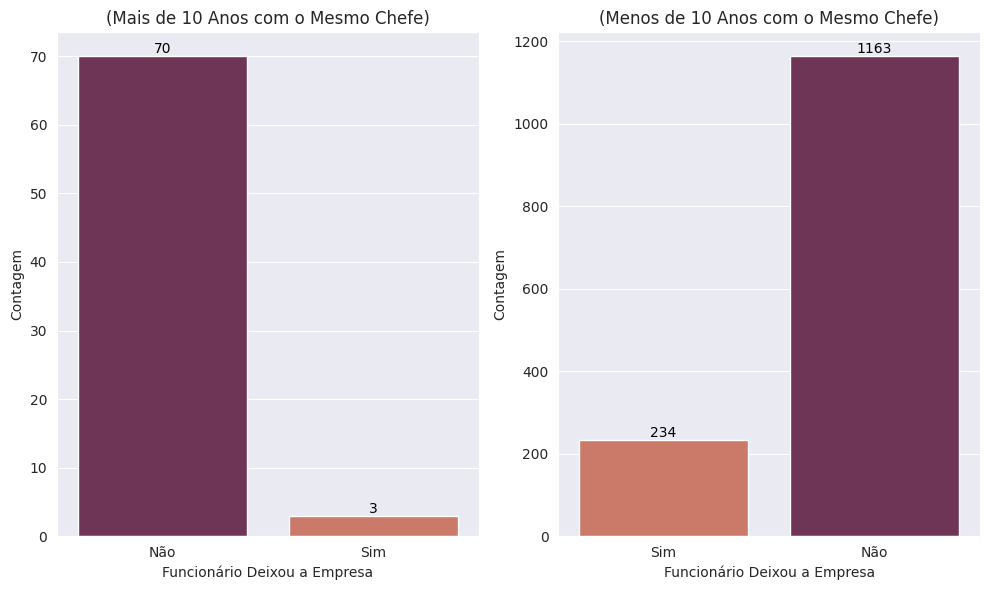

In [ ]:
# Filtrar funcionários que têm o mesmo chefe há mais de 10 anos
funcionarios_com_chefe_mais_dez = df2[df2['Anos_com_o_mesmo_chefe'] > 10]

# Filtrar funcionários que têm o mesmo chefe há menos de 10 anos
funcionarios_com_chefe_menos_dez = df2[df2['Anos_com_o_mesmo_chefe'] <= 10]

# Configurar subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Visualizar a distribuição para funcionários com chefe há mais de 10 anos
sns.countplot(x='Funcionário_deixou_a_empresa', data=funcionarios_com_chefe_mais_dez, ax=axs[0], palette=[ '#772b58','#db6e59'])
axs[0].set_title('(Mais de 10 Anos com o Mesmo Chefe)')
axs[0].set_xlabel('Funcionário Deixou a Empresa')
axs[0].set_ylabel('Contagem')
criar_anotacao_percent(axs[0],'contagem','black')


# Visualizar a distribuição para funcionários com chefe há menos de 10 anos
sns.countplot(x='Funcionário_deixou_a_empresa', data=funcionarios_com_chefe_menos_dez, ax=axs[1], palette=['#db6e59', '#772b58']) # Ajuste com as cores que desejar
axs[1].set_title('(Menos de 10 Anos com o Mesmo Chefe)')
axs[1].set_xlabel('Funcionário Deixou a Empresa')
axs[1].set_ylabel('Contagem')
criar_anotacao_percent(axs[1],'contagem','black')


# Ajustar layout
plt.tight_layout()



### H11 - Funcionários que fazem horas extras têm maior probabilidade de deixar a empresa.

**VERDADEIRA** - Funcionários que fazem horas extras têm uma maior probabilidade de deixar a empresa






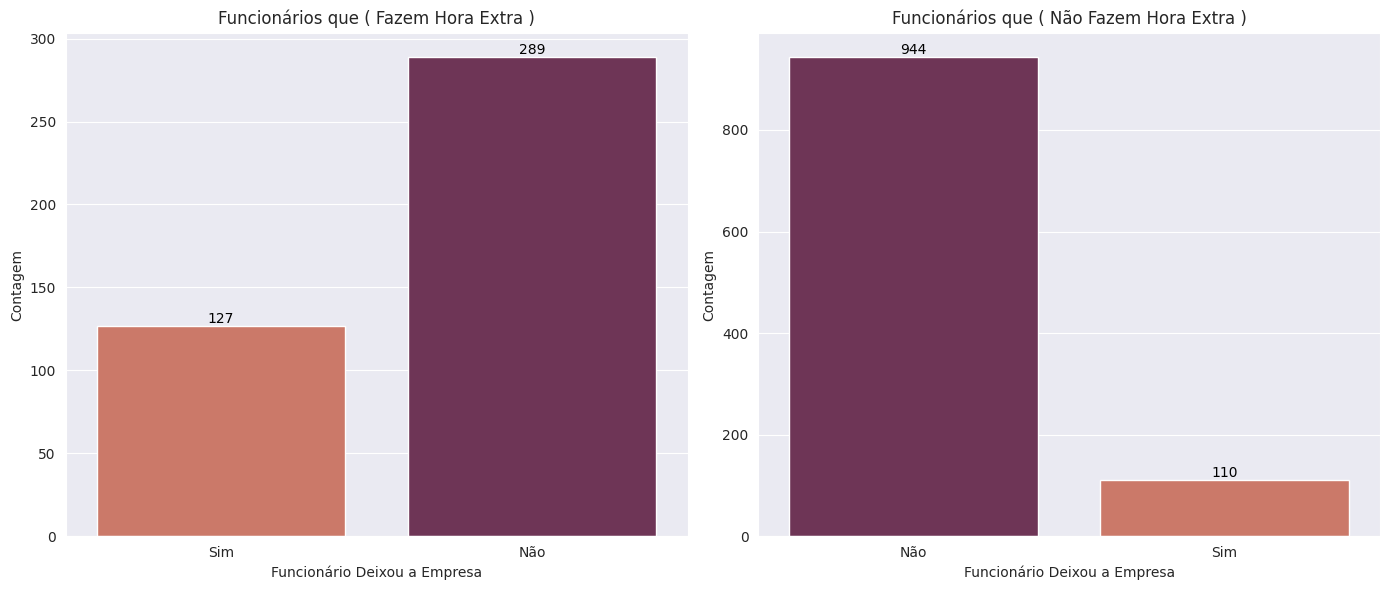

In [ ]:
# Filtrando funcionários que fazem hora extra
funcinarios_horas_extra = df2[df2['Faz_hora_extras?'] == 'Sim']

# Filtrando funcionários que NÃO fazem hora extra
funcinarios_horas_nao_extra = df2[df2['Faz_hora_extras?'] == 'Não']

# Configurar subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Visualizar a distribuição para funcionários que fazem hora extra
sns.countplot(x='Funcionário_deixou_a_empresa', data=funcinarios_horas_extra, ax=axs[0], palette=['#db6e59', '#772b58'] )
axs[0].set_title('Funcionários que ( Fazem Hora Extra )')
axs[0].set_xlabel('Funcionário Deixou a Empresa')
axs[0].set_ylabel('Contagem')
criar_anotacao_percent(axs[0],'contagem','black')


# Visualizar a distribuição para funcionários que não fazem hora extra
sns.countplot(x='Funcionário_deixou_a_empresa', data=funcinarios_horas_nao_extra, ax=axs[1], palette=['#772b58','#db6e59'])
axs[1].set_title('Funcionários que ( Não Fazem Hora Extra )')
axs[1].set_xlabel('Funcionário Deixou a Empresa')
axs[1].set_ylabel('Contagem')
criar_anotacao_percent(axs[1],'contagem','black')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


### H12 - Funcionários que moram a mais de 10 km do trabalho têm maior probabilidade de deixar a empresa.

**VERDADEIRA** - Funcionários que trabalham a uma distância menor têm uma menor taxa de turnover







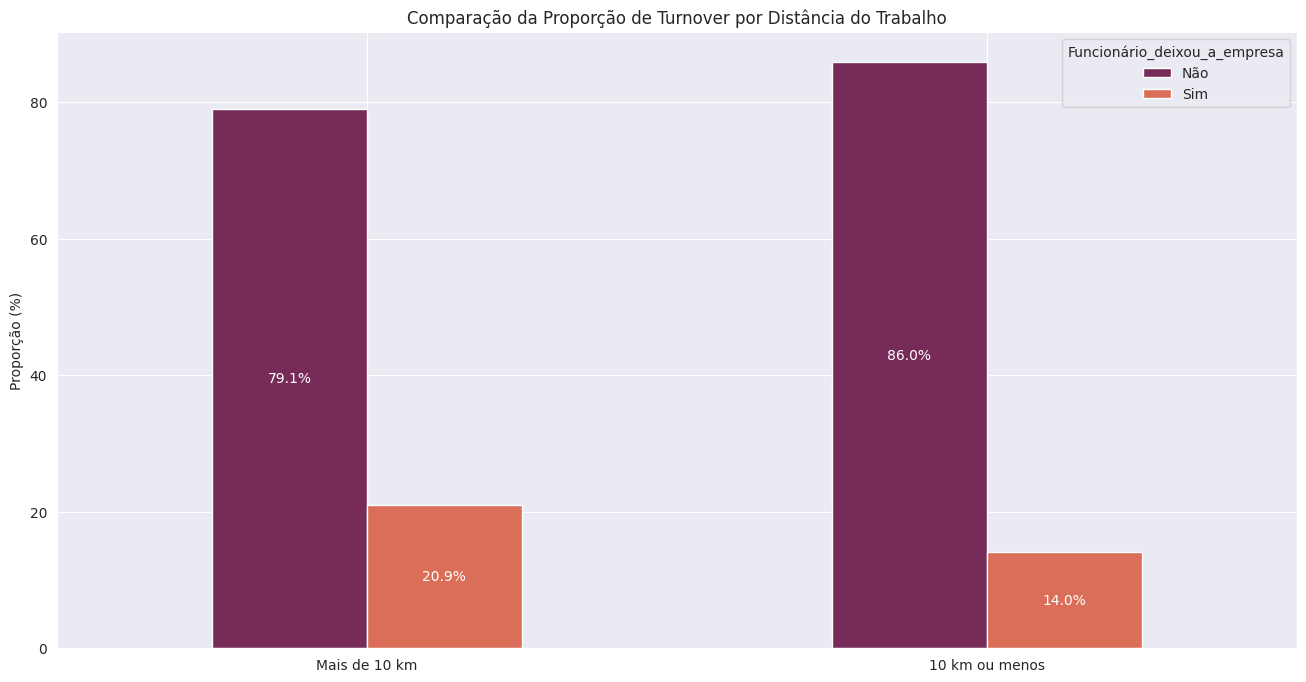

In [ ]:
# Filtrar funcionários
grupo_mais_de_10km = df2[df2['Distância_do_trabalho'] > 10]
grupo_menos_ou_igual_10km = df2[df2['Distância_do_trabalho'] <= 10]

# Calcular a proporção de turnover para cada grupo
turnover_mais_de_10km = grupo_mais_de_10km['Funcionário_deixou_a_empresa'].value_counts(normalize=True) * 100
turnover_menos_ou_igual_10km = grupo_menos_ou_igual_10km['Funcionário_deixou_a_empresa'].value_counts(normalize=True) * 100

# Criar um DataFrame para visualização
turnover_comparacao_distancia = pd.DataFrame({
    'Mais de 10 km': turnover_mais_de_10km,
    '10 km ou menos': turnover_menos_ou_igual_10km
}).transpose()



# Configurar o gráfico de barras para comparar as proporções de turnover
ax = turnover_comparacao_distancia.plot(kind='bar', stacked=False, color=['#772b58','#db6e59'], figsize=(16,8))
criar_anotacao_percent(ax,'porcentagem','white')
plt.ylabel('Proporção (%)')
plt.title('Comparação da Proporção de Turnover por Distância do Trabalho')
plt.xticks(rotation=0)




# Adicionar anotações

# Exibir o gráfico
plt.show()



### H13 - Funcionários que recebem aumentos abaixo de 15% têm maior probabilidade de deixar a empresa.

**VERDADEIRA** - Funcionários que receberam um aumento menor que 15% têm uma maior taxa de turnover,



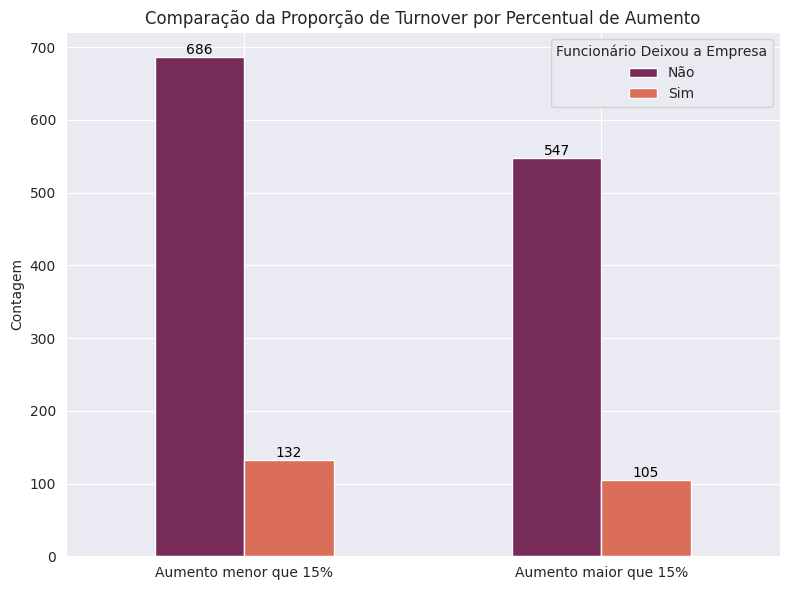

In [ ]:
# Dividir em dois grupos com base no percentual de aumento
aumento_abaixo_15 = df2[df2['Perc_de_aumento'] < 15]
aumento_acima_15 = df2[df2['Perc_de_aumento'] >= 15]

# Calcular proporções de turnover para cada grupo
turnover_abaixo_15 = aumento_abaixo_15['Funcionário_deixou_a_empresa'].value_counts()
turnover_acima_15 = aumento_acima_15['Funcionário_deixou_a_empresa'].value_counts()

# Criar DataFrame para visualização
turnover_comparacao = pd.DataFrame({
    'Aumento < 15%': turnover_abaixo_15,
    'Aumento >= 15%': turnover_acima_15
}).transpose()

# Configurar o gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
turnover_comparacao.plot(kind='bar', stacked=False, color=['#772b58','#db6e59'], ax=ax)
criar_anotacao_percent(ax,'contagem','black')
ax.set_ylabel('Contagem')
ax.set_title('Comparação da Proporção de Turnover por Percentual de Aumento')
ax.legend(title='Funcionário Deixou a Empresa', labels=['Não', 'Sim'])
ax.set_xticklabels(['Aumento menor que 15%', 'Aumento maior que 15%'], rotation=0)



# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

##3.3 Análise Multivariada
A análise multivariada foi realizada para explorar as relações entre múltiplas variáveis numéricas simultaneamente. A correlação entre as variáveis numéricas foi visualizada através de um heatmap, que ajuda a identificar a força e a direção das relações entre elas.

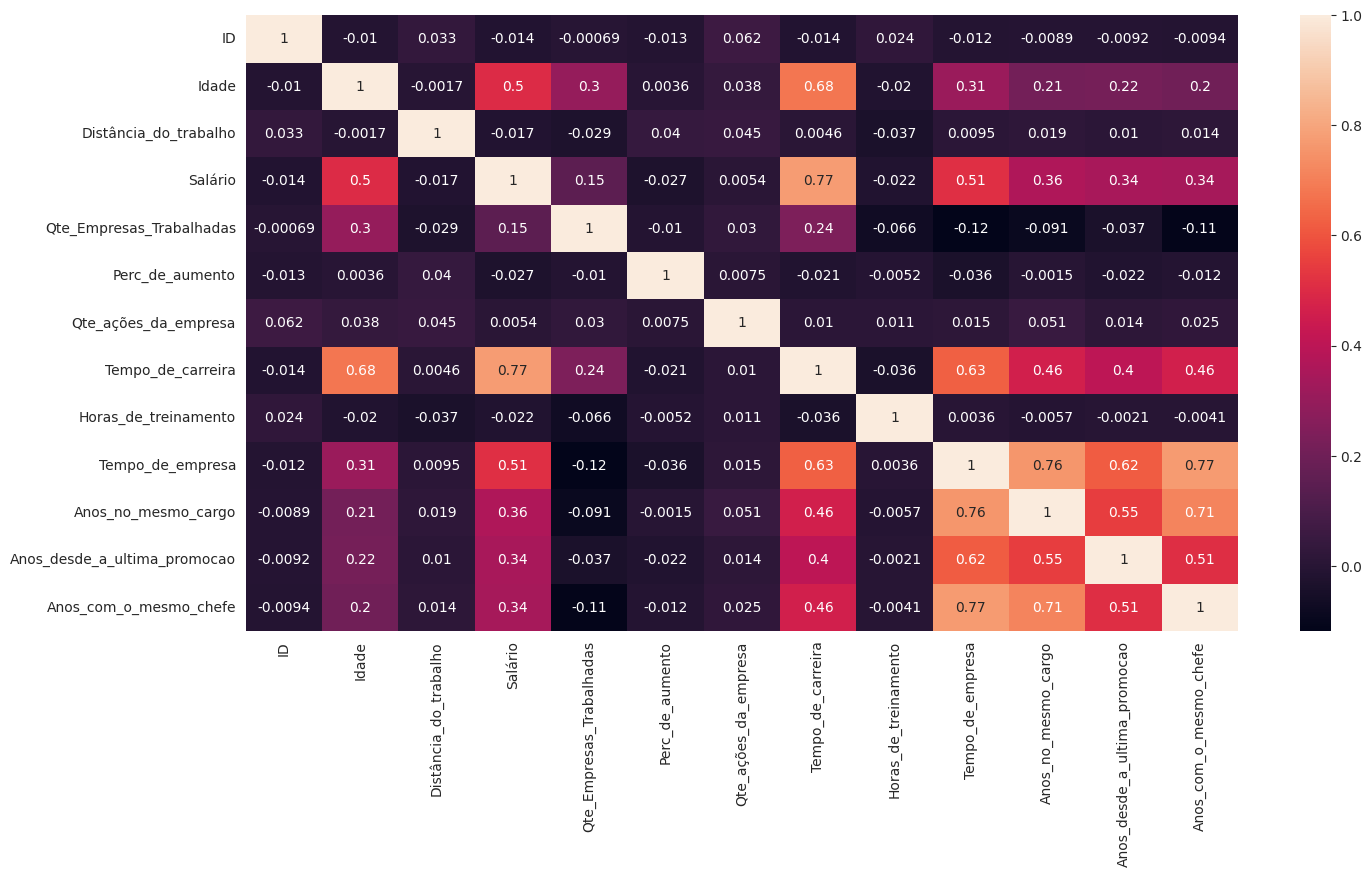

In [ ]:
correlation =  num_attributes.corr()
plt.figure( figsize=(16, 8) )
sns.heatmap( correlation, annot=True );

#**4.0 PREPROCESSAMENTO**

Nesta etapa, foram realizadas as transformações necessárias para preparar os dados para a modelagem preditiva. As principais etapas incluem a separação do conjunto de dados, reescalamento das variáveis, codificação das variáveis categóricas e o balanceamento da variável target.


In [ ]:
df3 = df2.copy()

In [ ]:
df3.head(3)

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,8,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,1,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,6,Sim,15,0,7,3,Muito bom,0,0,0,0


 ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ

---


##**Separando conjunto de dados**
Foi feita a separação do dataset em dados de treino e teste utilizando a função train_test_split da biblioteca scikit-learn. O objetivo dessa separação é garantir que o modelo seja avaliado em dados que não foram vistos durante o treinamento, evitando assim o overfitting. O conjunto de treino representa 70% dos dados, enquanto o conjunto de teste é 30%.

In [ ]:
X = df3.drop('Funcionário_deixou_a_empresa', axis=1)
y = df3['Funcionário_deixou_a_empresa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 20), (441, 20), (1029,), (441,))

##**Rescaling**
Para garantir que as variáveis numéricas possuam a mesma escala, realizei o reescalonamento dos dados numéricos. Para isso, utilizei duas técnicas de normalização:

MinMaxScaler: Normalizou as variáveis cujas distribuições estavam próximas de uma distribuição normal.

RobustScaler: Utilizado em variáveis com outliers significativos, pois essa técnica é robusta a valores extremos.

In [ ]:
# Inicializando os scalers
mms = MinMaxScaler()
rs = RobustScaler()

# Reescalando as variáveis no conjunto de treino
X_train['Salário'] = rs.fit_transform(X_train[['Salário']].values)
X_train['Perc_de_aumento'] = mms.fit_transform(X_train[['Perc_de_aumento']].values)
X_train['Idade'] = mms.fit_transform(X_train[['Idade']].values)
X_train['Distância_do_trabalho'] = mms.fit_transform(X_train[['Distância_do_trabalho']].values)
X_train['Tempo_de_carreira'] = mms.fit_transform(X_train[['Tempo_de_carreira']].values)
X_train['Tempo_de_empresa'] = mms.fit_transform(X_train[['Tempo_de_empresa']].values)
X_train['Anos_no_mesmo_cargo'] = mms.fit_transform(X_train[['Anos_no_mesmo_cargo']].values)
X_train['Anos_com_o_mesmo_chefe'] = mms.fit_transform(X_train[['Anos_com_o_mesmo_chefe']].values)

# Aplicando as mesmas transformações ao conjunto de teste
X_test['Salário'] = rs.transform(X_test[['Salário']].values)
X_test['Perc_de_aumento'] = mms.transform(X_test[['Perc_de_aumento']].values)
X_test['Idade'] = mms.transform(X_test[['Idade']].values)
X_test['Distância_do_trabalho'] = mms.transform(X_test[['Distância_do_trabalho']].values)
X_test['Tempo_de_carreira'] = mms.transform(X_test[['Tempo_de_carreira']].values)
X_test['Tempo_de_empresa'] = mms.transform(X_test[['Tempo_de_empresa']].values)
X_test['Anos_no_mesmo_cargo'] = mms.transform(X_test[['Anos_no_mesmo_cargo']].values)
X_test['Anos_com_o_mesmo_chefe'] = mms.transform(X_test[['Anos_com_o_mesmo_chefe']].values)



##**Enconding**

As variáveis categóricas foram transformadas em valores numéricos para que pudessem ser interpretadas pelos algoritmos de machine learning. Foram usadas duas abordagens:

LabelEncoder: Para variáveis categóricas binárias ou com poucas categorias, como Frequência de Viagens, Gênero e Faz Hora Extra.

Map: Para variáveis com múltiplos níveis, como Formação, Satisfação com a Empresa (E-Sat), Estado Civil e Equilíbrio de Vida, onde criamos mapeamentos específicos para cada categoria.

In [ ]:
le = LabelEncoder()

list_col_acate=['Frequência de Viagens','Gênero','Faz_hora_extras?']
for col in list_col_acate:
  X_train[col] = le.fit_transform(X_train[col])


#Formação
formacao_dict = {'Ensino Médio':1, 'Ensino Técnico':2, 'Ensino Superior':3,'Doutorado':4,'Mestrado':5}
X_train['Formação'] = X_train['Formação'].map(formacao_dict)

#E-Sat
esat_dict = {'Baixo':1, 'Médio':2, 'Alto':3, 'Muito Alto':4}
X_train['E-Sat'] = X_train['E-Sat'].map(esat_dict)

#Estado_Civil
estado_civil_dict = {'Solteiro':1, 'Casado':2, 'Divorciado':3}
X_train['Estado_Civil'] = X_train['Estado_Civil'].map(estado_civil_dict)

#Equilibrio_de_Vida
equilibrio_vida_dict = {'Ruim':1, 'Bom':2, 'Muito bom':3, 'Excelente':4}
X_train['Equilibrio_de_Vida'] = X_train['Equilibrio_de_Vida'].map(equilibrio_vida_dict)

In [ ]:
# DADOS DE TESTE
list_col_acate=['Frequência de Viagens','Gênero','Faz_hora_extras?']
for col in list_col_acate:
  X_test[col] = le.fit_transform(X_test[col])


#Formação
formacao_dict = {'Ensino Médio':1, 'Ensino Técnico':2, 'Ensino Superior':3,'Doutorado':4,'Mestrado':5}
X_test['Formação'] = X_test['Formação'].map(formacao_dict)

#E-Sat
esat_dict = {'Baixo':1, 'Médio':2, 'Alto':3, 'Muito Alto':4}
X_test['E-Sat'] = X_test['E-Sat'].map(esat_dict)

#Estado_Civil
estado_civil_dict = {'Solteiro':1, 'Casado':2, 'Divorciado':3}
X_test['Estado_Civil'] = X_test['Estado_Civil'].map(estado_civil_dict)

#Equilibrio_de_Vida
equilibrio_vida_dict = {'Ruim':1, 'Bom':2, 'Muito bom':3, 'Excelente':4}
X_test['Equilibrio_de_Vida'] = X_test['Equilibrio_de_Vida'].map(equilibrio_vida_dict)

## **Balanceamento**

A variável target do projeto apresentava desbalanceamento, com mais funcionários que não deixaram a empresa do que funcionários que saíram. Para corrigir esse problema e evitar que o modelo se tornasse enviesado para a classe majoritária, apliquei o SMOTE (Synthetic Minority Over-sampling Technique). O SMOTE gera novas amostras sintéticas da classe minoritária para balancear o conjunto de treino.

Após a aplicação do SMOTE, o número de amostras foi balanceado, com 853 amostras para cada classe.

In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicando o SMOTE apenas no conjunto de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificando o balanceamento
print("Distribuição de classes após o SMOTE:", y_train_res.value_counts())


Distribuição de classes após o SMOTE: Funcionário_deixou_a_empresa
Não    853
Sim    853
Name: count, dtype: int64


In [ ]:
y_train_res.value_counts()

,count
Funcionário_deixou_a_empresa,
Não,853
Sim,853


##**FEATURE SELECTION**

A seleção de variáveis (features) é uma etapa importante no processo de modelagem, pois ajuda a identificar as variáveis que mais contribuem para a previsão do target.

Para realizar essa seleção, foi utilizado o Boruta, um algoritmo baseado em árvores de decisão que funciona de forma robusta para identificar as features importantes.

In [ ]:
# Iniciar o modelo de RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Configurar o Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42).fit(X_train_res.values, y_train_res)


In [ ]:
important_features = X_train.columns[boruta_selector.support_].tolist()
print("Variáveis importantes selecionadas pelo Boruta:", important_features)

Variáveis importantes selecionadas pelo Boruta: ['ID', 'Idade', 'Distância_do_trabalho', 'E-Sat', 'Estado_Civil', 'Salário', 'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira', 'Tempo_de_empresa', 'Anos_no_mesmo_cargo', 'Anos_com_o_mesmo_chefe']


In [ ]:
important_features = [feature for feature in important_features if feature != 'ID']
important_features

['Idade',
 'Distância_do_trabalho',
 'E-Sat',
 'Estado_Civil',
 'Salário',
 'Perc_de_aumento',
 'Qte_ações_da_empresa',
 'Tempo_de_carreira',
 'Tempo_de_empresa',
 'Anos_no_mesmo_cargo',
 'Anos_com_o_mesmo_chefe']

In [ ]:
rejected_features = X_train.columns[~boruta_selector.support_].tolist()
print("Variáveis rejeitadas pelo Boruta:", rejected_features)

Variáveis rejeitadas pelo Boruta: ['Frequência de Viagens', 'Formação', 'Gênero', 'Qte_Empresas_Trabalhadas', 'Faz_hora_extras?', 'Horas_de_treinamento', 'Equilibrio_de_Vida', 'Anos_desde_a_ultima_promocao']


#**5.0 MODELO DE MACHINE LEARNING**

Nesta seção, explorei diferentes modelos de machine learning para prever o turnover dos funcionários. Utilizando as variáveis importantes selecionadas pelo algoritmo Boruta para treinar e testar os modelos.

Os dados de treino foram balanceados utilizando a técnica SMOTE para garantir que as classes de funcionários que deixaram a empresa ("Sim") e os que permaneceram ("Não") estivessem igualmente representadas. Dessa forma, foi possível avaliar os modelos de forma mais justa em relação à capacidade de prever ambas as classes.

Os modelos foram avaliados utilizando as métricas de acurácia, precisão, recall e f1-score, com foco especial na performance da classe de funcionários que deixaram a empresa (classe "Sim").

Modelos avaliados:

 - Regressão Logística
 - Árvore de Decisão
 - Random Forest

In [ ]:
# Usar as variáveis importantes do Boruta para treino e teste
X_train_res_boruta = X_train_res[important_features]
X_test_boruta = X_test[important_features]


## **REGRESSÃO LOGÍSTICA**

Regressão Logística:
O modelo de regressão logística foi treinado e testado. O desempenho foi avaliado utilizando a matriz de confusão e o relatório de classificação.
A acurácia obtida foi de 84%, com um f1-score para a classe 'Sim' de 0.24, mostrando que o modelo tem uma performance razoável, mas apresenta dificuldades em prever corretamente a saída de funcionários.

In [ ]:
# Criar e treinar o modelo
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_res_boruta, y_train_res)

# Fazer previsões no conjunto de teste
y_pred = lr_model.predict(X_test_boruta)


# Avaliar o modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




[[360  20]
 [ 50  11]]
              precision    recall  f1-score   support

         Não       0.88      0.95      0.91       380
         Sim       0.35      0.18      0.24        61

    accuracy                           0.84       441
   macro avg       0.62      0.56      0.58       441
weighted avg       0.81      0.84      0.82       441



## **ÁRVORE DE DECISÃO**

O modelo de árvore de decisão foi treinado e testado.
A acurácia obtida foi de 73%, com um f1-score para a classe 'Sim' de 0.20, sugerindo que o modelo tem maior dificuldade em predizer a saída de funcionários.

In [ ]:
# Instanciando o modelo de Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Treinando o modelo com os dados de treino
decision_tree.fit(X_train_res, y_train_res)

# Fazendo previsões nos dados de teste
y_pred_dt = decision_tree.predict(X_test)

# Avaliando o desempenho
print("Acurácia da Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_dt))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_dt))


Acurácia da Decision Tree: 0.7278911564625851

Relatório de Classificação:
               precision    recall  f1-score   support

         Não       0.87      0.81      0.84       380
         Sim       0.17      0.25      0.20        61

    accuracy                           0.73       441
   macro avg       0.52      0.53      0.52       441
weighted avg       0.77      0.73      0.75       441


Matriz de Confusão:
 [[306  74]
 [ 46  15]]


##**ÁRVORE ALEATÓRIA**

O modelo Random Forest foi treinado e testado.
A acurácia obtida foi de 84%, com um f1-score para a classe 'Sim' de 0.24, indicando que, mesmo com a melhor acurácia geral, o modelo também apresenta dificuldades em prever corretamente a classe minoritária (funcionários que saem da empresa).

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res_boruta, y_train_res)

y_pred_rf = rf_model.predict(X_test_boruta)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[359  21]
 [ 50  11]]
              precision    recall  f1-score   support

         Não       0.88      0.94      0.91       380
         Sim       0.34      0.18      0.24        61

    accuracy                           0.84       441
   macro avg       0.61      0.56      0.57       441
weighted avg       0.80      0.84      0.82       441



# **6.0 CONCLUSÃO**
Este projeto teve como objetivo analisar o turnover em uma empresa e identificar as principais variáveis que influenciam a saída de funcionários, a fim de criar um modelo preditivo que ajude a prever essa taxa.

**O processo foi conduzido em várias etapas importantes:**

Exploração de Dados: Analisamos tanto variáveis numéricas quanto categóricas para entender o comportamento dos dados, validando hipóteses sobre as possíveis causas de turnover.

Preprocessamento: Aplicamos técnicas de balanceamento com SMOTE, reescalação e encoding das variáveis, além da seleção de variáveis importantes usando o método Boruta.

Modelos de Machine Learning: Testamos três modelos principais — Regressão Logística, Árvore de Decisão e Random Forest — para avaliar a capacidade de previsão da saída de funcionários.

Embora os modelos apresentem uma precisão razoável, o recall para a classe minoritária ("Sim", funcionários que deixaram a empresa) precisa de melhorias. O desempenho geral dos modelos foi satisfatório, considerando que o projeto está em estágio intermediário de desenvolvimento.

**Pontos Finais:**

**Desempenho do Modelo**: Os modelos de machine learning não apresentaram um desempenho ideal para prever funcionários que deixariam a empresa (classe minoritária), sugerindo a necessidade de ajustes finos e técnicas adicionais de balanceamento.

**Aplicação em Cenários Reais**: Mesmo com alguns desafios no modelo, os resultados mostram um bom entendimento das etapas de ciência de dados e sua aplicação prática.

**Próximos Passos**: Refinar os modelos, explorando novos hiperparâmetros, ou utilizar técnicas mais avançadas para melhorar o recall da classe minoritária seria o próximo passo lógico para elevar a performance do modelo.